In this notebook, I try to implement Qiskit's qiskit-nature packages to use a VQE to find the ground state energy of H2.
Working through documentation provided on the site for Qiskit Nature, I set up this ElectricEnergy Problem to successfully approximate the ground state energy.

In [2]:
%pip install qiskit[visualization]
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
  Using cached pydot-3.0.2-py3-none-any.whl.metadata (10 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pydot-3.0.2-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached qiskit_aer-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
Using cached qiskit_aer-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached qiskit_ibm_runtime-0.31.0-py3-none-any.whl.metadata (19 kB)
  Using cached requests_ntlm-1.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached ibm_platform_services-0.58.0-py3-none-any.whl.metadata (9.0 kB)
  

In [3]:
%pip install qiskit-nature
%pip install pyscf

  Using cached qiskit_nature-0.7.2-py3-none-any.whl.metadata (8.0 kB)
  Using cached qiskit_algorithms-0.3.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached h5py-3.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached qiskit_nature-0.7.2-py3-none-any.whl (2.2 MB)
Using cached qiskit_algorithms-0.3.1-py3-none-any.whl (310 kB)
Using cached h5py-3.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.5 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached pyscf-2.7.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
Using cached pyscf-2.7.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (48.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver(
    atom= "H 0 0 0; H 0 0 0.735",  
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

In [5]:
problem = driver.run()
print(problem)


In [6]:
hamiltonian = problem.hamiltonian

coefficients = hamiltonian.electronic_integrals
print(coefficients.alpha)

Polynomial Tensor
 "+-":
array([[-1.25633907e+00, -1.37083854e-17],
       [-6.07732712e-17, -4.71896007e-01]])
 "++--":
array([6.75710155e-01, 1.39486891e-16, 1.80931200e-01, 6.64581730e-01,
       2.57172666e-16, 6.98573723e-01])


In [7]:
second_q_op = hamiltonian.second_q_op()
print(second_q_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.33229086512764816 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.33229086512764816 * ( +_0 +_3 -_3 -_0 )
+ 0.0904655998921157 * ( +_0 +_0 -_1 -_1 )
+ 0.0904655998921157 * ( +_0 +_1 -_0 -_1 )
+ 0.0904655998921157 * ( +_0 +_2 -_3 -_1 )
+ 0.0904655998921157 * ( +_0 +_3 -_2 -_1 )
+ 0.0904655998921157 * ( +_1 +_0 -_1 -_0 )
+ 0.0904655998921157 * ( +_1 +_1 -_0 -_0 )
+ 0.0904655998921157 * ( +_1 +_2 -_3 -_0 )
+ 0.0904655998921157 * ( +_1 +_3 -_2 -_0 )
+ 0.33229086512764816 * ( +_1 +_0 -_0 -_1 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764816 * ( +_1 +_2 -_2 -_1 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.33229086512764816 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740175813 * ( +_2 +_2 -_2 -_2 )
+ 0.33229086512764816 * ( +_2 +_3 -_3 -_2 )
+ 0.0904655998921157 * ( +_2 +_0 -_1 -_3 )
+ 0.0904655998921157 * ( +

In [8]:
hamiltonian.nuclear_repulsion_energy 


0.7199689944489797

In [9]:
problem.molecule

MoleculeInfo(symbols=['H', 'H'], coords=[(0.0, 0.0, 0.0), (0.0, 0.0, 1.3889487015553204)], multiplicity=1, charge=0, units=<DistanceUnit.BOHR: 'Bohr'>, masses=[1, 1])

In [10]:
problem.reference_energy

-1.116998996754004

In [11]:
problem.num_particles

(1, 1)

In [12]:
problem.num_spatial_orbitals

2

In [13]:
problem.basis

<ElectronicBasis.MO: 'molecular'>

In [14]:
problem.properties

In [15]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.mappers import JordanWignerMapper

solver = GroundStateEigensolver(
    JordanWignerMapper(),
    NumPyMinimumEigensolver(),
)

In [16]:
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.388948701555]
    - computed part:      [0.0  0.0  1.388948701555]
  > Dipole moment (a.u.): [0.0  0.0  -0.000000001555]  Total: 0.000000001555
                 (debye): [0.0  0.0  -0.000000003953]  Total: 0.000000003953
 


In [19]:
mapper = JordanWignerMapper()

In [52]:
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator as EstimatorOld
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

vqe_solver = VQE(EstimatorOld(), ansatz, SLSQP())
vqe_solver.initial_point = [0.0] * ansatz.num_parameters

/tmp/ipykernel_169/274316906.py:18: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe_solver = VQE(EstimatorOld(), ansatz, SLSQP())


In [21]:
calc = GroundStateEigensolver(mapper, vqe_solver)


In [22]:
res = calc.solve(problem)
print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030145
  - computed part:      -1.857275030145
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035696
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.38894895863]
    - computed part:      [0.0  0.0  1.38894895863]
  > Dipole moment (a.u.): [0.0  0.0  -0.00000025863]  Total: 0.00000025863
                 (debye): [0.0  0.0  -0.000000657372]  Total: 0.000000657372
 


In [22]:
res = calc.solve(problem)
print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030145
  - computed part:      -1.857275030145
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035696
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.38894895863]
    - computed part:      [0.0  0.0  1.38894895863]
  > Dipole moment (a.u.): [0.0  0.0  -0.00000025863]  Total: 0.00000025863
                 (debye): [0.0  0.0  -0.000000657372]  Total: 0.000000657372
 


I now try to import two of the backend simulators of quantum computers to try to simulate this calculation directly following the prescribed method from the graded notebooks. However, I am unable to successfully transform the Hamiltonian into something usable. 

In [53]:
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)


### Don't change any code past this line ###
    print(energy)
    return energy, result

In [54]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [56]:
backend_answer = FakeSherbrooke()
optimization_level_answer = 1

pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)

isa_circuit = pm.run(ansatz) 
num_params = ansatz.num_parameters

pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

QiskitError: 'Number of qargs does not match (4 != 3)'

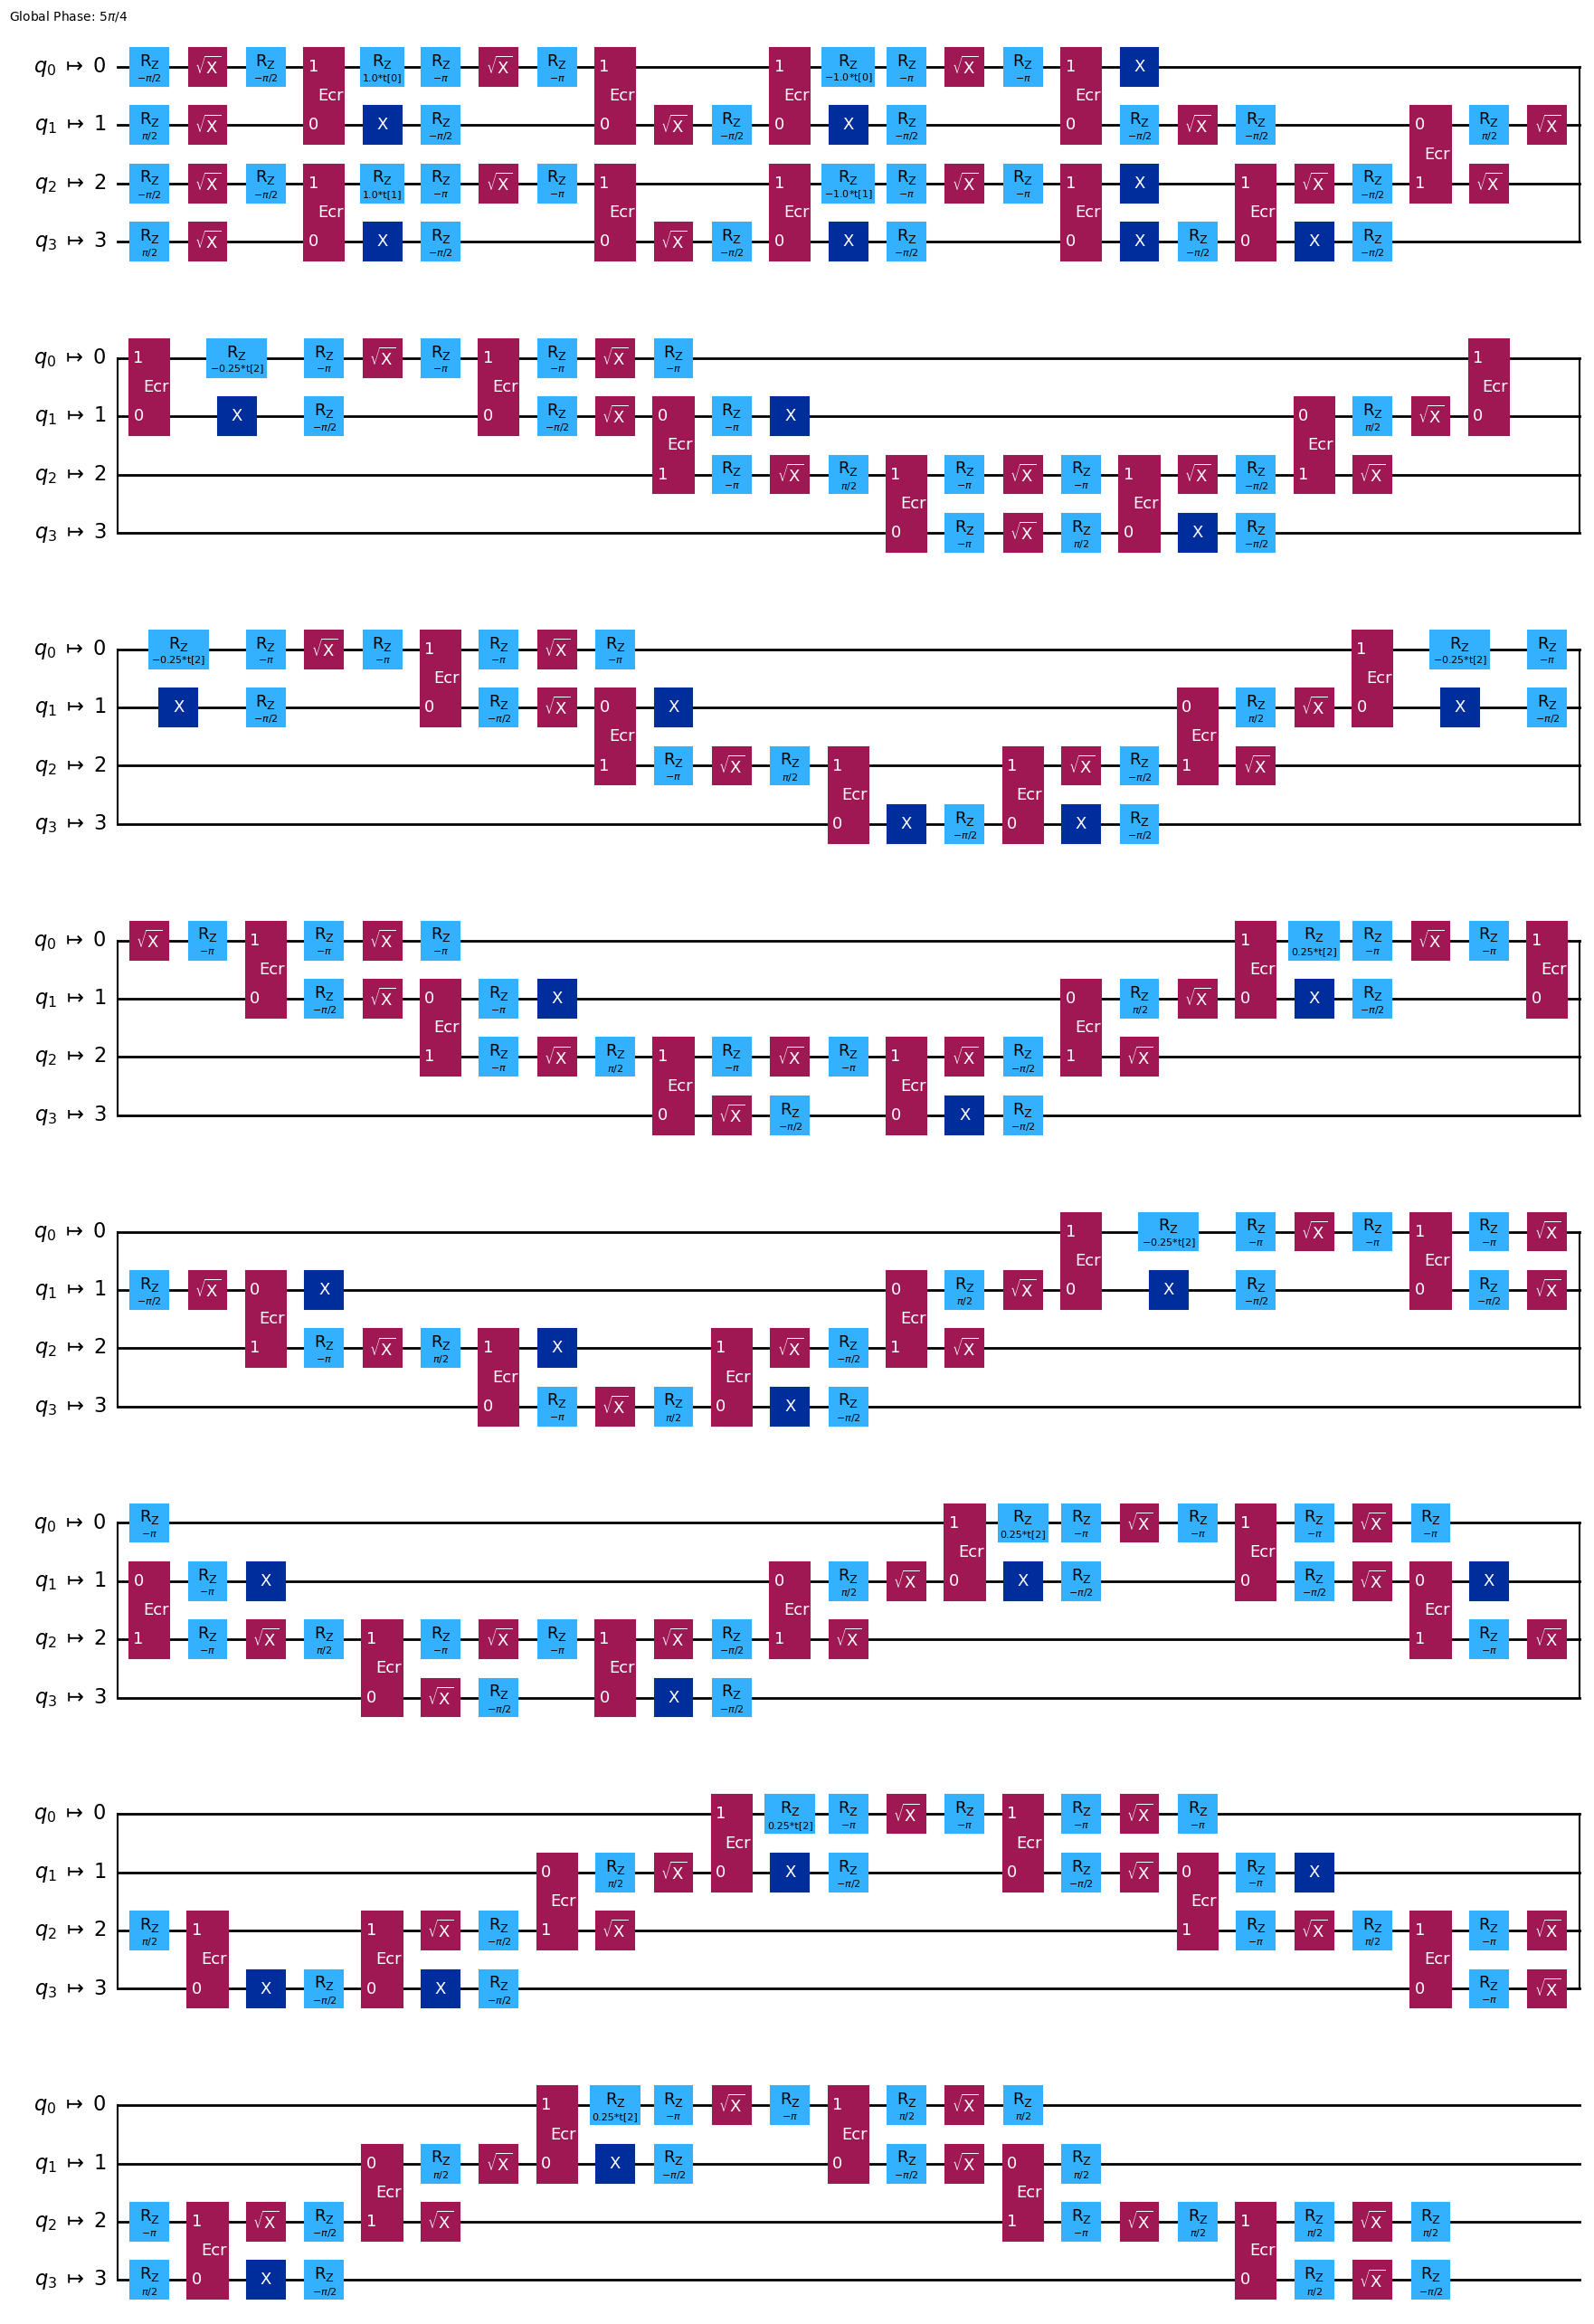

In [50]:
isa_circuit.draw('mpl', idle_wires=False,)

In [43]:
x0 = 2 * np.pi * np.random.random(num_params)

In [44]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

#backend = FakeSherbrooke()
backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

estimator = Estimator(backend)

res = minimize(
    cost_func_2,
    x0,
    args=(isa_circuit, hamiltonian, estimator, callback_dict),
    method="cobyla",
    options={'maxiter': 30})

TypeError: Invalid observable type: <class 'qiskit_nature.second_q.hamiltonians.electronic_energy.ElectronicEnergy'>